# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

****

### Exercises

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:

#1. Is the distribution of body temperature normal?
#df.head()
#min(df.temperature), max(df.temperature) = (96.299999999999997, 100.8)
#np.percentile(df.temperature, [25,75]) #IQR = .9
#ideal bin width = 2 * .9 * 130^(-1/3) ~ .355
#number of bins = 4.5/.355 ~ 12.7 round up to 13
_ = plt.hist(df.temperature, bins=13, normed=True)
plt.show()

NameError: name 'plt' is not defined

## 1. Is the Distribution of body temperature normal? 
Histograms are a great way to see distribution in a series. In this case I tried to find the ideal number of bins by using the Freedman-Diaconis Rule, bin width (h) should be 2 * IQR(x) * n^(-1/3) and number of bins is (max(x) - min(x))/h

You can see from the plot, the distribution is not normal, it has several high peaks in the middle, a steep drop off as temp gets higher, and some outliers. 

In [4]:
#2. Is the sample size large?
dfsize = len(df.temperature)
print(dfsize)

130


## 2. Is the sample size large?
Not compared to total human population in 1868, but in terms of picking between a T or Z test, yes. That would put are sample size at just over .00001 percent of the population at the time (again a rough estimate).)

In [13]:
#3. Is the True Population mean really 98.6 degrees F?
dfmean = df.temperature.mean()
print(dfmean)

98.24923076923078


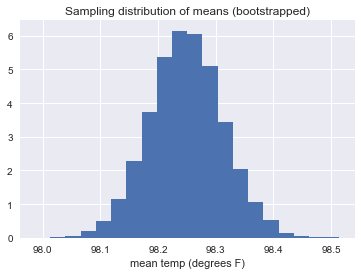

In [45]:
# Random sample to get a vector of mean temperatures
def bootstrap_mean(data, nSample, niter=10000):
    mean_list = []
    np.random.seed(100)

    for i in range(nIter):
        sample = np.random.choice(data, size = nSample)
        mean_list.append(np.mean(sample))

    # Convert to series
    series = pd.Series(mean_list)

    return series

mean_temp = bootstrap_mean(df.temperature, 130)
#histogram
_ = plt.hist(mean_temp, bins = 20, normed=True)
_ = plt.title("Sampling distribution of means (bootstrapped)")
_ = plt.xlabel('mean temp (degrees F)')
plt.show()

## 3. Is the true population mean really 98.6 degrees F?
        No, see above calculation and above bootstrapped data. In the histogram, 98.6 doesn't even register.
    a. Would you use a one-sample or two-sample test? Why?
        One-sample, since we are looking for the mean temperature of all humans, we just need one population data set,         we shouldn't have to split it up as men v women. 
    b. In this situation, is it appropriate to use the  t or  z statistic?
        Since our sample size is large enough and we can calculate the standard deviation, we can use the Z value.
    c. Now try using the other test. How is the result different? Why?
        see below
        Our Z and T values are very similar, this is due to the T-test's likeness to the Z-test as sample size        increases. 

In [15]:
#One-Sample Z-test
#Our null hypothesis is that the mean temperature of the population is 98.6 degrees F
std = np.std(df.temperature)

#calculate Z value:
z_value = (dfmean - 98.6)/(std/np.sqrt(len(df.temperature)))
print('z-value= ', z_value)

#try with T-test
resultsarray = scipy.stats.ttest_1samp(df.temperature, 98.6)
print('t-value= ', resultsarray[0])
print('p-value= ', resultsarray[1])

z-value=  -5.47592520208
t-value=  -5.45482329236
p-value=  2.41063204156e-07


Our z/t-value is way off our expected 1.96 for 95% confidence so we can determine our null hypothesis is false, the true population mean temperature is most likely not 98.6 degrees F. 

## 4. At what temperature should we consider someone's temperature to be "abnormal"?
    We'll go back to our bootstrapped data for this. The 95% confidence interval places the average temperature in the range of 98.1 to 98.4 (see below), any temperatures above or below that can be considered abnormal.

In [46]:
#confidence interval
confint = np.percentile(mean_temp, [2.5, 97.5])
print('95% confidence interval:', confint)

95% confidence interval: [ 98.12384615  98.37615385]


5. Is there a significant difference between males and females in normal temperature?
    We can see below that there is a significant difference but we'll want to use a 2-sample test to prove it.

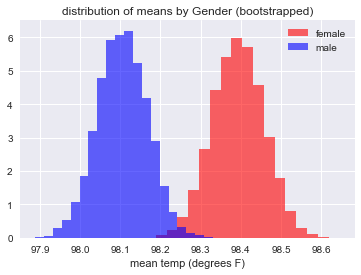

male 95% conf:  [ 97.98230769  98.22307692]
female 95% conf:  [ 98.26921154  98.51923077]


In [61]:
data_f = df[df.gender == 'F'].temperature
data_m = df[df.gender == 'M'].temperature

means_f = bootstrap_mean(data_f, 130)
means_m = bootstrap_mean(data_m, 130)

#histogram
_ = plt.hist(means_f, bins = 20, normed=True, color='red', alpha = .6, label='female')
_ = plt.hist(means_m, bins = 20, normed=True, color='blue', alpha = .6, label='male')
_ = plt.title("distribution of means by Gender (bootstrapped)")
_ = plt.xlabel('mean temp (degrees F)')
_ = plt.legend()

plt.show()

male_conf = np.percentile(means_m, [2.5, 97.5])
female_conf = np.percentile(means_f, [2.5, 97.5])

print('male 95% conf: ', male_conf)
print('female 95% conf: ', female_conf)

In [60]:
#we want to test null hypothesis that males and females have same mean temp
#first shift the mean of our two sample sets to match the mean of the set as a while
data_f_shifted = data_f - data_f.mean() + dfmean
data_m_shifted = data_m - data_m.mean() + dfmean
#get new bootstrapped means
means_f = bootstrap_mean(data_f_shifted, 130)
means_m = bootstrap_mean(data_m_shifted, 130)

#get original diff of means to test against
sample_diff_mean= data_f.mean() - data_m.mean()
diff_means = means_f-means_m
p_value = np.sum(diff_means >= sample_diff_mean)/(len(diff_means))
print('p_value = ', p_value)

p_value =  0.0006


Our p-value is very low, meaning the mean temp between males and females is significantly different in our data set. 

### Using sample data from 130 people, the average body temperature was found to be between 98.12 and 98.38 with 95% confidence. Our data also shows that there is statistical significance between male and female body temperature and females typically have a higher body temperature than males.